ABOUT:

This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

In [1]:
# importing the neccessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'/home/4670b115/Melbourne'

In [3]:
# reading the  data
df=pd.read_csv("/home/4680b115/Melbourne Housing/MELBOURNE_HOUSE_PRICES_LESS.csv")
df1=pd.read_csv("/home/4680b115/Melbourne Housing/Melbourne_housing_FULL.csv")

In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [5]:
df1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [6]:
df.shape

(63023, 13)

In [7]:
df1.shape

(34857, 21)

In [8]:
df.nunique()

Suburb             380
Address          57754
Rooms               14
Type                 3
Price             3417
Method               9
SellerG            476
Date               112
Postcode           225
Regionname           8
Propertycount      368
Distance           180
CouncilArea         34
dtype: int64

In [9]:
df1.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [12]:
# converting dtype of Date from object to Datetime
df['Date'] = pd.to_datetime(df['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])

In [13]:
# Checking and removing any duplicates from the data
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,2018-03-31,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [14]:
# Checking and removing any duplicates from the data
df1[df1.duplicated()]
df1.drop_duplicates(inplace=True)
df1

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [15]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14589
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [16]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63021.000000,4.843200e+04,63021.000000,63021.000000,63021.000000
mean,3.110614,9.978980e+05,3125.674727,7617.791895,12.684930
std,0.957556,5.935050e+05,125.628659,4424.477446,7.592042
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


the data is slightly right skewed 

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['Price']] = imputer.fit_transform(df[['Price']])
df.isnull().sum().sum()

0

In [18]:
df1.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [19]:
df1.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34856.000000,2.724700e+04,34855.000000,34855.000000,26639.000000,26630.000000,26128.000000,23046.000000,13741.000000,15550.000000,26880.000000,26880.000000,34853.000000
mean,3.031013,1.050173e+06,11.184808,3116.062430,3.084650,1.624747,1.728835,593.607177,160.251616,1965.287653,-37.810634,145.001845,7572.962901
std,0.969947,6.414671e+05,6.788952,109.025437,0.980708,0.724177,1.010789,3398.915462,401.281270,37.328340,0.090281,0.120167,4428.131940
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754092,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


the data is slightly right skewed for few columns

In [20]:
#dropping columns
df1 = df1.drop(columns=['BuildingArea', 'YearBuilt'])

Dropping the above features because they have more missing values and filling them will lead to miscalculation of data

In [21]:
imputercat = SimpleImputer(strategy='most_frequent')
df1[['CouncilArea', 'Regionname']] = imputercat.fit_transform(df1[['CouncilArea', 'Regionname']] )

The above 2 features are categorical so we fill with most frequent by simple imputer

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df1[['Price','Bathroom','Car','Lattitude','Bedroom2','Postcode','Propertycount','Distance','Longtitude','Landsize']] = imputer.fit_transform(df1[['Price','Bathroom','Car','Lattitude','Bedroom2','Postcode','Propertycount','Distance','Longtitude','Landsize']])

In [23]:
df1.isnull().sum().sum()

0

In [24]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [25]:
df1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [26]:
data = pd.merge(df,df1,how = 'inner',on=['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG','Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance','CouncilArea'])

In [27]:
data.shape

(16454, 19)

In [28]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
dtype: int64

In [29]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,Abbotsford,256 Langridge St,3,h,1350000.0,S,Biggin,2017-01-07,3067,Northern Metropolitan,4019,3.0,Yarra City Council,3.0,2.0,2.0,521.0,-37.80760,145.00780
1,Airport West,16 Glenys Av,3,h,858000.0,SP,Raine,2017-01-07,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,2.0,2.0,521.0,-37.80760,145.00780
2,Airport West,1/9 Kitson Cr,2,u,593000.0,S,Nelson,2017-01-07,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,2.0,2.0,521.0,-37.80760,145.00780
3,Airport West,118 Marshall Rd,3,h,640000.0,S,Nelson,2017-01-07,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,219.0,-37.71655,144.88155
4,Airport West,9 South Rd,3,h,961000.0,S,Nelson,2017-01-07,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,3.0,1.0,2.0,717.0,-37.72274,144.88002


In [30]:
data.nunique()

Suburb             344
Address          16266
Rooms               11
Type                 3
Price             2352
Method               5
SellerG            290
Date                75
Postcode           209
Regionname           8
Propertycount      336
Distance           168
CouncilArea         33
Bedroom2            12
Bathroom             9
Car                 13
Landsize          1335
Lattitude        10210
Longtitude       10623
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16454 entries, 0 to 16453
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         16454 non-null  object        
 1   Address        16454 non-null  object        
 2   Rooms          16454 non-null  int64         
 3   Type           16454 non-null  object        
 4   Price          16454 non-null  float64       
 5   Method         16454 non-null  object        
 6   SellerG        16454 non-null  object        
 7   Date           16454 non-null  datetime64[ns]
 8   Postcode       16454 non-null  int64         
 9   Regionname     16454 non-null  object        
 10  Propertycount  16454 non-null  int64         
 11  Distance       16454 non-null  float64       
 12  CouncilArea    16454 non-null  object        
 13  Bedroom2       16454 non-null  float64       
 14  Bathroom       16454 non-null  float64       
 15  Car            1645

In [32]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
count,16454.000000,1.645400e+04,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000,16454.000000
mean,3.082776,1.033030e+06,3126.023034,7659.401604,12.899167,3.160447,1.743224,1.889510,627.352072,-37.805929,145.004973
std,0.937520,6.291752e+05,133.015818,4459.253551,7.819730,0.793458,0.622230,0.869576,3818.931798,0.093425,0.124562
min,1.000000,1.120000e+05,3000.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790
25%,3.000000,6.350000e+05,3051.000000,4385.000000,6.800000,3.000000,1.000000,1.000000,521.000000,-37.846888,144.958827
50%,3.000000,8.550000e+05,3101.000000,6795.000000,11.700000,3.000000,2.000000,2.000000,521.000000,-37.807600,145.007800
75%,4.000000,1.255000e+06,3163.000000,10529.000000,17.200000,4.000000,2.000000,2.000000,601.000000,-37.759460,145.064820
max,16.000000,1.120000e+07,3978.000000,21650.000000,48.100000,16.000000,9.000000,18.000000,433014.000000,-37.397800,145.526350


the data is slightly right skewed

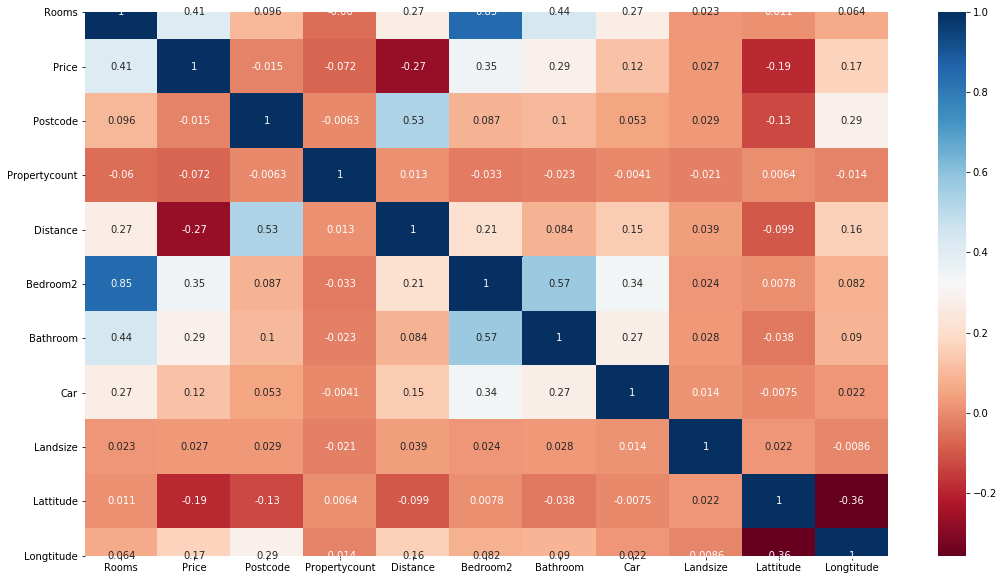

In [33]:
#correlation matrix
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True, cmap="RdBu")
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

DATA VISUALIZATION

In [34]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.week

In [35]:
data["Type"].value_counts()

h    11705
u     3107
t     1642
Name: Type, dtype: int64

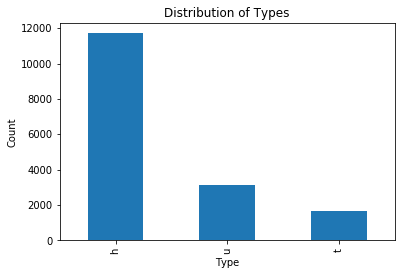

In [36]:
#Visualizing the Type Data
data["Type"].value_counts().plot(kind="bar")
plt.title("Distribution of Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

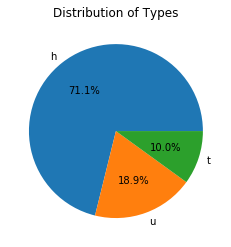

In [37]:
# Count the frequency of each value in the Type column
value_counts = data['Type'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.show()

In [38]:
data["Method"].value_counts()

S     10485
SP     2269
PI     1878
VB     1676
SA      146
Name: Method, dtype: int64

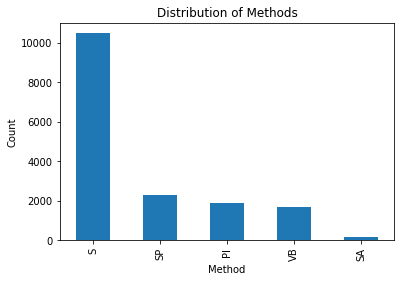

In [39]:
#Visualizing the Method Data
data["Method"].value_counts().plot(kind="bar")
plt.title("Distribution of Methods")
plt.xlabel("Method")
plt.ylabel("Count")
plt.show()

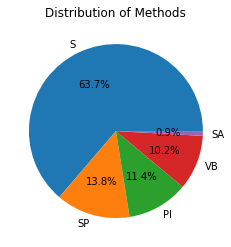

In [40]:
# Count the frequency of each value in the Method column
value_counts = data['Method'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Methods')
plt.show()

In [41]:
data["Regionname"].value_counts()

Northern Metropolitan         4736
Southern Metropolitan         4204
Western Metropolitan          3375
Eastern Metropolitan          2434
South-Eastern Metropolitan    1277
Eastern Victoria               166
Northern Victoria              166
Western Victoria                96
Name: Regionname, dtype: int64

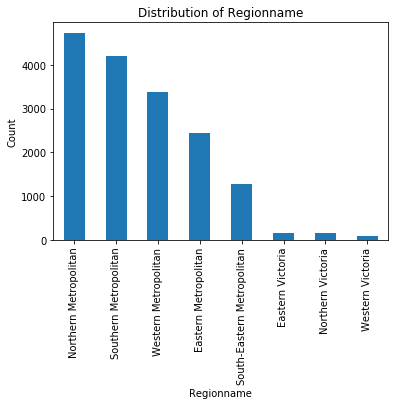

In [42]:
#Visualizing the Regionname Data
data["Regionname"].value_counts().plot(kind="bar")
plt.title("Distribution of Regionname")
plt.xlabel("Regionname")
plt.ylabel("Count")
plt.show()

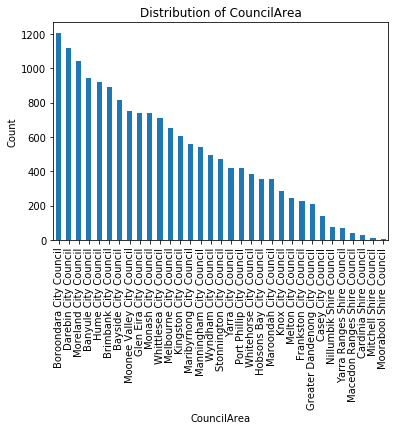

In [43]:
#Visualizing the CouncilArea Data
data["CouncilArea"].value_counts().plot(kind="bar")
plt.title("Distribution of CouncilArea")
plt.xlabel("CouncilArea")
plt.ylabel("Count")
plt.show()

plotting the graph for average weekly sales for the years 2016,2017,2018 based on week

In [44]:
data["Year"].value_counts()

2017    12585
2018     3673
2016      196
Name: Year, dtype: int64

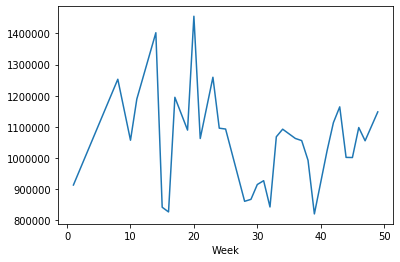

In [45]:
# Average Sales for the year 2017
price_2017 = data[data['Year']==2017]['Price'].groupby(data['Week']).mean()
sns.lineplot(x=price_2017.index, y=price_2017.values)

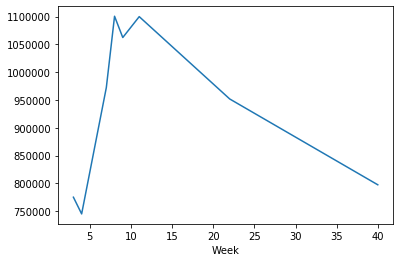

In [46]:
# Average Sales for the year 2018
price_2018 = data[data['Year']==2018]['Price'].groupby(data['Week']).mean()
sns.lineplot(x=price_2018.index, y=price_2018.values)

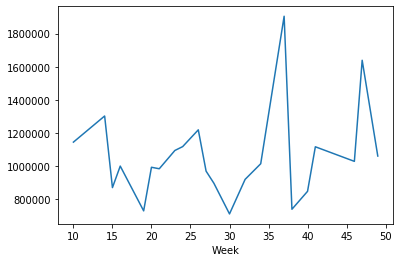

In [47]:
# Average Sales for the year 2016
price_2016 = data[data['Year']==2016]['Price'].groupby(data['Week']).mean()
sns.lineplot(x=price_2016.index, y=price_2016.values)

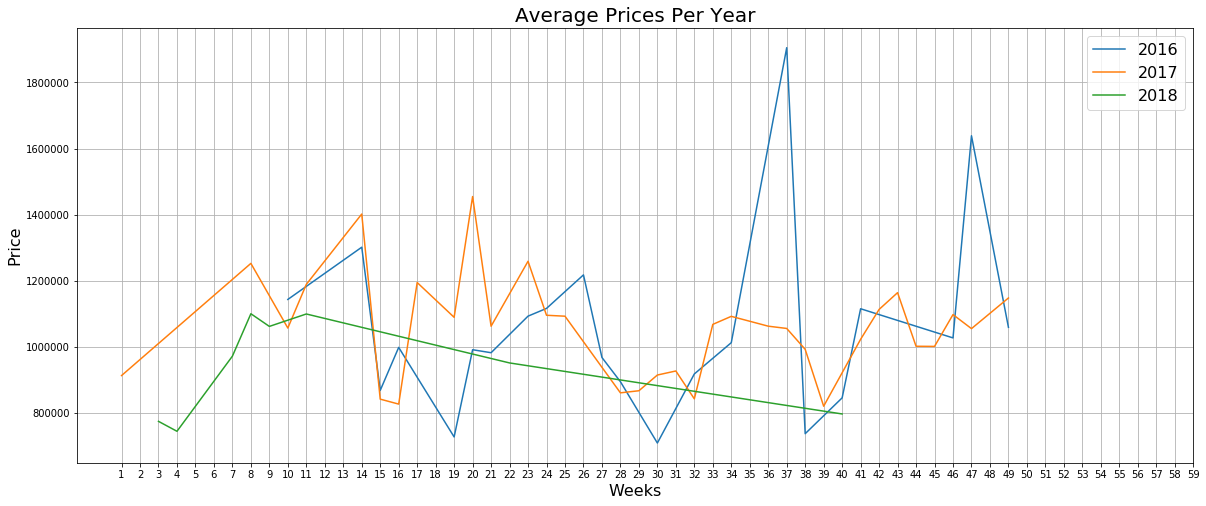

In [48]:
# Plotting the above three plot together 
plt.figure(figsize=(20,8))
sns.lineplot(x=price_2016.index, y=price_2016.values)
sns.lineplot(x=price_2017.index, y=price_2017.values)
sns.lineplot(x=price_2018.index, y=price_2018.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2016', '2017', '2018'], loc='best', fontsize=16)
plt.title('Average Prices Per Year', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Weeks', fontsize=16)
plt.show()

plotting the graph for average price for the Regionname

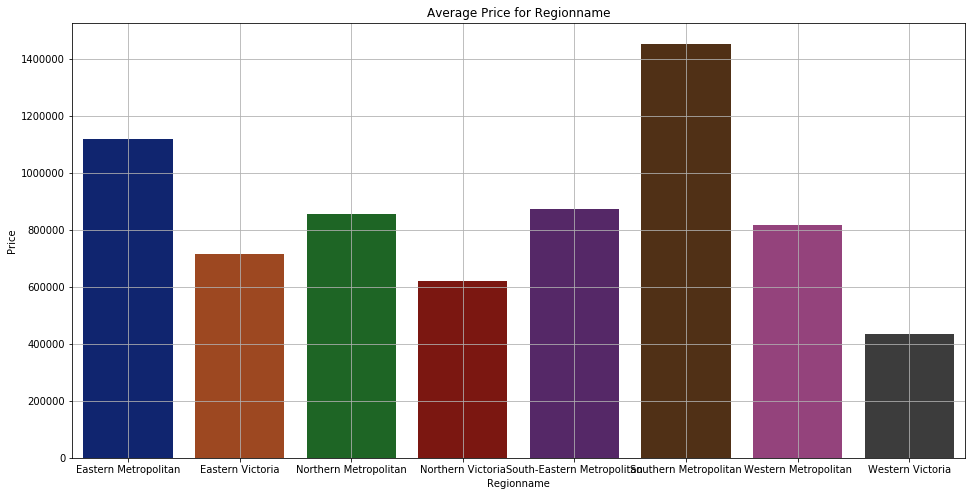

In [49]:
# Average Sales per Regionname
plt.figure(figsize=(16,8))
price = data['Price'].groupby(data['Regionname']).mean()
sns.barplot(x=price.index, y=price.values, palette='dark')
plt.grid()
plt.title('Average Price for Regionname')
plt.xlabel('Regionname')
plt.ylabel('Price')
plt.show()

plotting the graph for average price for the CouncilArea

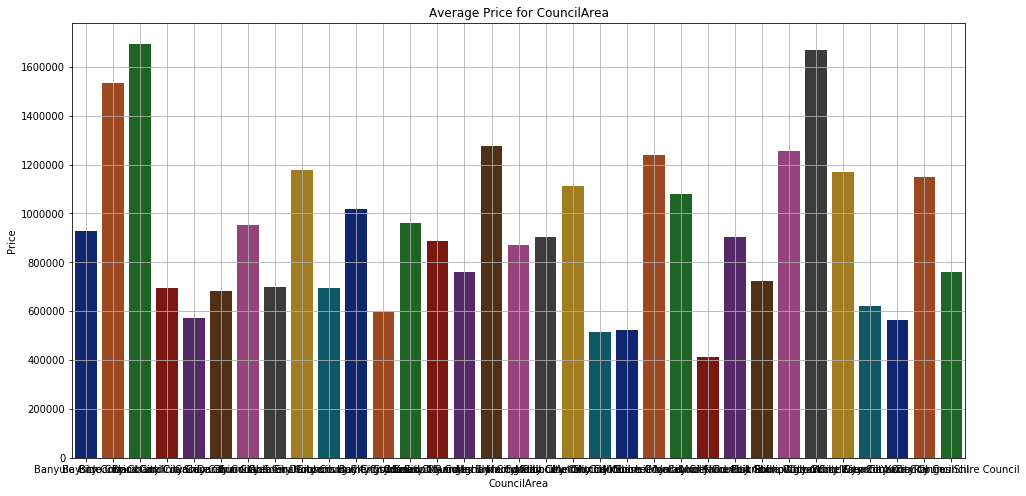

In [50]:
# Average Sales per CouncilArea
plt.figure(figsize=(16,8))
price = data['Price'].groupby(data['CouncilArea']).mean()
sns.barplot(x=price.index, y=price.values, palette='dark')
plt.grid()
plt.title('Average Price for CouncilArea')
plt.xlabel('CouncilArea')
plt.ylabel('Price')
plt.show()

plotting scatter plot for all columns w.r.to target

In [51]:
def scatter(data, column):
    plt.figure()
    plt.scatter(data[column], data['Price'])
    plt.ylabel('Price')
    plt.xlabel(column)
    plt.grid(True)


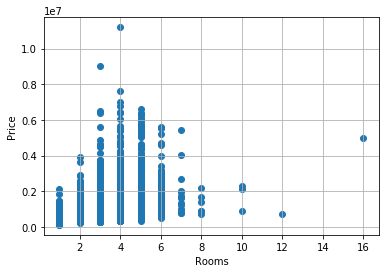

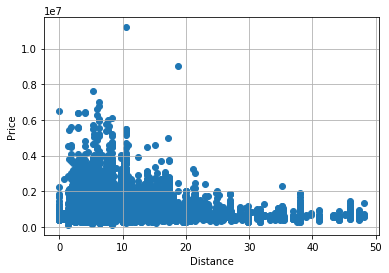

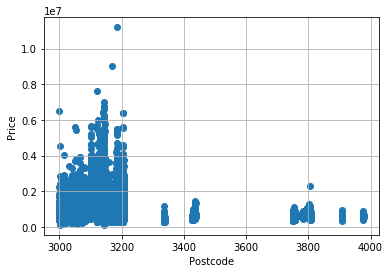

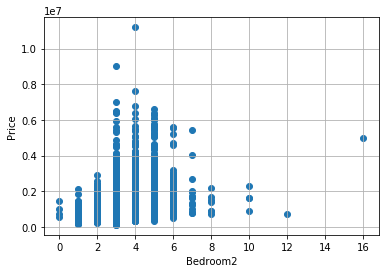

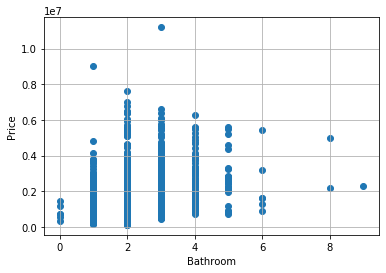

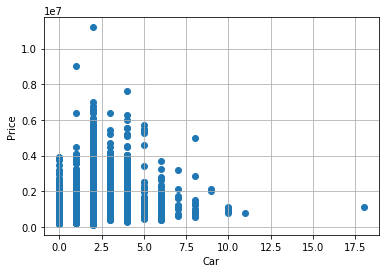

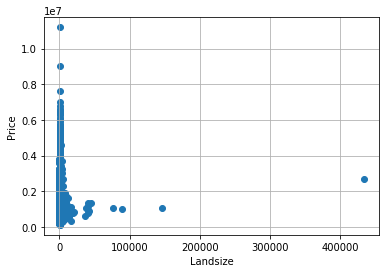

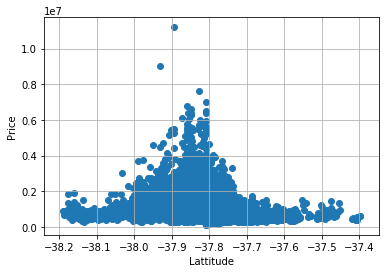

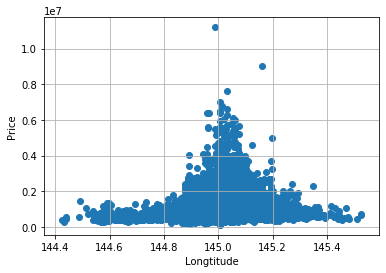

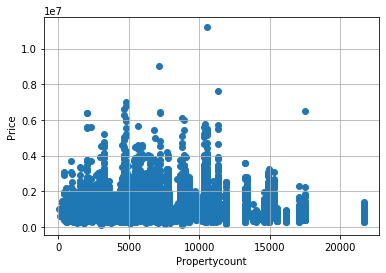

In [52]:
scatter(data, 'Rooms')
scatter(data, 'Distance')
scatter(data, 'Postcode')
scatter(data, 'Bedroom2')
scatter(data, 'Bathroom')
scatter(data, 'Car')
scatter(data, 'Landsize')
scatter(data, 'Lattitude')
scatter(data, 'Longtitude')
scatter(data, 'Propertycount')

plotting Boxplot to observe the outliers

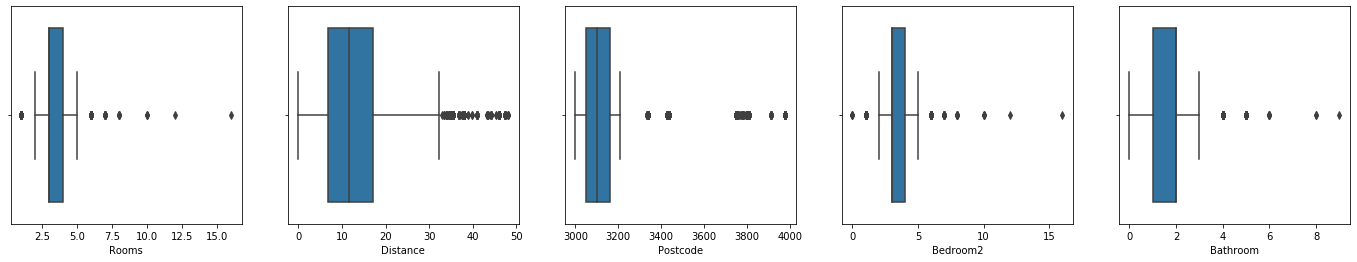

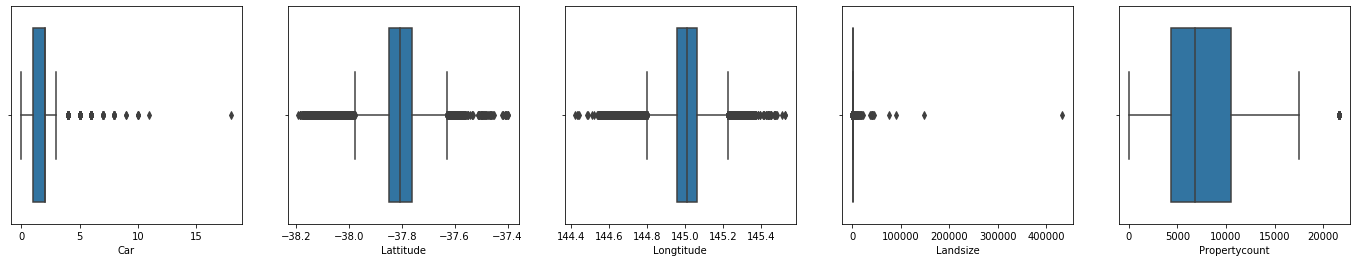

In [53]:
plt.figure(figsize = (24,4))
plt.subplot(1,5,1)
sns.boxplot(data['Rooms'])
plt.subplot(1,5,2)
sns.boxplot(data['Distance'])
plt.subplot(1,5,3)
sns.boxplot(data['Postcode'])
plt.subplot(1,5,4)
sns.boxplot(data['Bedroom2'])
plt.subplot(1,5,5)
sns.boxplot(data['Bathroom'])
plt.show()
plt.figure(figsize = (24,4))
plt.subplot(1,5,1)
sns.boxplot(data['Car'])
plt.subplot(1,5,2)
sns.boxplot(data['Lattitude'])
plt.subplot(1,5,3)
sns.boxplot(data['Longtitude'])
plt.subplot(1,5,4)
sns.boxplot(data['Landsize'])
plt.subplot(1,5,5)
sns.boxplot(data['Propertycount'])
plt.show()

In [54]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude',
       'Longtitude', 'Year', 'Month', 'Day', 'Week'],
      dtype='object')

In [55]:
data.nunique()

Suburb             344
Address          16266
Rooms               11
Type                 3
Price             2352
Method               5
SellerG            290
Date                75
Postcode           209
Regionname           8
Propertycount      336
Distance           168
CouncilArea         33
Bedroom2            12
Bathroom             9
Car                 13
Landsize          1335
Lattitude        10210
Longtitude       10623
Year                 3
Month               12
Day                 30
Week                41
dtype: int64

In [56]:
data = data.drop(['Address','SellerG'],axis=1)

Retriving the numerical columns

In [57]:
data_num=data[['Rooms','Price','Postcode','Propertycount','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude']]
data_num.head()

,Rooms,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,3,1350000.0,3067,4019,3.0,3.0,2.0,2.0,521.0,-37.80760,145.00780
1,3,858000.0,3042,3464,10.4,3.0,2.0,2.0,521.0,-37.80760,145.00780
2,2,593000.0,3042,3464,10.4,3.0,2.0,2.0,521.0,-37.80760,145.00780
3,3,640000.0,3042,3464,10.4,3.0,1.0,2.0,219.0,-37.71655,144.88155
4,3,961000.0,3042,3464,10.4,3.0,1.0,2.0,717.0,-37.72274,144.88002


In [58]:
data_num.shape

(16454, 11)

As the data was slightly right skewed we have to do normalization for numerical columns

In [59]:
# normalizing the numerical columns
data_num = (data_num - data_num.min()) / (data_num.max() - data_num.min())
data_num

,Rooms,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,0.133333,0.111652,0.068507,0.182501,0.062370,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
1,0.133333,0.067280,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
2,0.066667,0.043380,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
3,0.133333,0.047619,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.000506,0.597858,0.415179
4,0.133333,0.076569,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.001656,0.590048,0.413792
...,...,...,...,...,...,...,...,...,...,...,...
16449,0.133333,0.046492,0.177914,0.543562,0.471933,0.1875,0.111111,0.333333,0.001314,0.279361,0.687917
16450,0.133333,0.032738,0.074642,1.000000,0.249480,0.1875,0.111111,0.055556,0.001203,0.621652,0.543762
16451,0.200000,0.043200,0.065440,0.266611,0.428274,0.2500,0.222222,0.111111,0.001203,0.698661,0.458905
16452,0.133333,0.060290,0.175869,0.184124,0.461538,0.1875,0.222222,0.055556,0.001256,0.268625,0.656962


In [60]:
data["Suburb"].value_counts()

Brunswick         387
Reservoir         342
Bentleigh East    219
Craigieburn       211
Richmond          194
                 ... 
Darley              1
croydon             1
Botanic Ridge       1
Coldstream          1
Wandin North        1
Name: Suburb, Length: 344, dtype: int64

In [61]:
data["Type"].value_counts()

h    11705
u     3107
t     1642
Name: Type, dtype: int64

In [62]:
data["Method"].value_counts()

S     10485
SP     2269
PI     1878
VB     1676
SA      146
Name: Method, dtype: int64

In [63]:
data["Regionname"].value_counts()

Northern Metropolitan         4736
Southern Metropolitan         4204
Western Metropolitan          3375
Eastern Metropolitan          2434
South-Eastern Metropolitan    1277
Eastern Victoria               166
Northern Victoria              166
Western Victoria                96
Name: Regionname, dtype: int64

In [64]:
data["CouncilArea"].value_counts()

Boroondara City Council           1206
Darebin City Council              1116
Moreland City Council             1042
Banyule City Council               942
Hume City Council                  918
Brimbank City Council              888
Bayside City Council               816
Moonee Valley City Council         750
Glen Eira City Council             738
Monash City Council                737
Whittlesea City Council            709
Melbourne City Council             649
Kingston City Council              608
Maribyrnong City Council           560
Manningham City Council            542
Wyndham City Council               492
Stonnington City Council           473
Yarra City Council                 419
Port Phillip City Council          417
Whitehorse City Council            383
Hobsons Bay City Council           357
Maroondah City Council             356
Knox City Council                  287
Melton City Council                243
Frankston City Council             229
Greater Dandenong City Co

In [65]:
data_cat =data[['Type','Method','Regionname','CouncilArea','Suburb']]
data_cat.shape

(16454, 5)

In [66]:
# dummification for categorical variables
g_dum=pd.get_dummies(data_cat)

In [67]:
g_dum

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,...,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wonga Park,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16449,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16450,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16451,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16452,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data_num.columns

Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude'],
      dtype='object')

In [69]:
# concating the numerical column and updated categorical column 
data_final=pd.concat([g_dum,data_num],axis=1)
data_final.head()

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,...,Price,Postcode,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,1,0,0,0,1,0,0,0,0,0,...,0.111652,0.068507,0.182501,0.062370,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
1,1,0,0,0,0,0,1,0,0,0,...,0.067280,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
2,0,0,1,0,1,0,0,0,0,0,...,0.043380,0.042945,0.156767,0.216216,0.1875,0.222222,0.111111,0.001203,0.482987,0.529685
3,1,0,0,0,1,0,0,0,0,0,...,0.047619,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.000506,0.597858,0.415179
4,1,0,0,0,1,0,0,0,0,0,...,0.076569,0.042945,0.156767,0.216216,0.1875,0.111111,0.111111,0.001656,0.590048,0.413792


In [70]:
data_final.shape

(16454, 404)

In [71]:
data_final['Price']

0        0.111652
1        0.067280
2        0.043380
3        0.047619
4        0.076569
           ...   
16449    0.046492
16450    0.032738
16451    0.043200
16452    0.060290
16453    0.061237
Name: Price, Length: 16454, dtype: float64

In [72]:
# importing neccessary libraries
from sklearn.model_selection import train_test_split

# splitting of data
X = data_final.drop(['Price'],axis=1)
y = data_final['Price']

In [73]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

MODEL BUILDING FROM SK-LEARN

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth = 5.5,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5.5, random_state=42)

In [75]:
y_pred = rf.predict(X_train)

In [76]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.020301805212448124
Mean Squared Error: 0.001045939093660896
Root Mean Squared Error: 0.032340981643433395
R-squared: 0.6728068686243895


In [77]:
rf.fit(X_test, y_test)
y_preds =rf.predict(X_test)

In [78]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.01921053780826693
Mean Squared Error: 0.0008878815928816559
Root Mean Squared Error: 0.029797342043908142
R-squared: 0.7284774552407531


MODEL BUILDING FROM SCRATCH

In [79]:
import numpy as np
import pandas as pd

class DecisionTreeRegressor: #which implements a decision tree regression algorithm
    def __init__(self, max_depth=2): # initialize the object's attributes
        self.max_depth = max_depth
    
    def fit(self, X, y): #X and y, which represent the input features and target values
        self.tree = self.build_tree(X, y, depth=0) # build_tree method to construct the decision tree using the input data and the specified max_depth
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape # assigns samples and features to rows and columns 
        
        if depth == self.max_depth or n_samples == 5: #whether the maximum depth of the tree has been reached 
            return np.mean(y) #the method returns the mean of the target values, which will be used as the prediction for the leaf node.
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False) #selects two random features from the input data without replacement and calls
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs) #find_best_split method to determine the best feature and threshold to split the data on
        
        if best_threshold is None: #it means that if no good split was found then return mean of target column
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold #indicate which samples in the input data should go to the left or right child node
        right_idxs = X[:, best_feature] >= best_threshold #based on whether their values for the best feature are less than or greater than or equal to the best threshold.
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1) # recursively calls the build_tree method on the left and right subsets of the input data
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1) #passing in the corresponding input and target values and increasing the depth by 1.
        
        return (best_feature, best_threshold, left_tree, right_tree)
        # the method returns a tuple containing the best feature, best threshold, and the left and right child nodes as subtrees
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf') #creates a floating-point value that represents positive infinity
        best_feature = None #because it is used to keep track of the best found so far to split the data on
        best_threshold = None
        
        for feature in feature_idxs: # code loops over each feature in feature_idxs
            thresholds = np.unique(X[:, feature]) # loops over each unique threshold value for that feature
            
            for threshold in thresholds: # boolean index arrays are created to indicate which samples in the input data should go to which side
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0: #checks whether there are any samples in either the left or right child node
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score: # if split_score is better than best score,feature,.. found, then it is updated otherwise previous best is kept
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold # returns best values
    
    def split_score(self, y, y_left, y_right): # calculates the score for splitting the y target variable into two subgroups y_left and y_right
        p_left = len(y_left) / len(y) # calculates the proportion of instances in y_left compared to the total number of instances in y
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right) # calculates the score for splitting y into y_left and y_right
        # np.var() function calculates the variance of an array
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [80]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_train, y_train)
# Use the KNeighborsRegressor to make predictions on the train data
y_predic = rf.predict(X_train)

In [81]:
import numpy as np

def mean_absolute_error(y_train, y_predic):
    return np.mean(np.abs(y_train - y_predic))

def mean_squared_error(y_train, y_predic):
    return np.mean((y_train - y_predic)**2)

def root_mean_squared_error(y_train, y_predic):
    return np.sqrt(mean_squared_error(y_train, y_predic))

def r2_score(y_train, y_predic):
    ssr = np.sum((y_train - y_predic)**2)
    sst = np.sum((y_train - np.mean(y_train))**2)
    return 1 - (ssr / sst)

# Assuming y_true and y_pred are NumPy arrays or Pandas Series
mae = mean_absolute_error(y_train, y_predic)
mse = mean_squared_error(y_train, y_predic)
rmse = root_mean_squared_error(y_train, y_predic)
r2 = r2_score(y_train, y_predic)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.03811730069174005
Mean Squared Error: 0.0038070000965000116
Root Mean Squared Error: 0.06170089218560791
R-squared: -0.19091473898473343


In [82]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_test, y_test)
y_prediction= rf.predict(X_test)

In [83]:
import numpy as np

def mean_absolute_error(y_test, y_prediction):
    return np.mean(np.abs(y_test - y_prediction))

def mean_squared_error(y_test, y_prediction):
    return np.mean((y_test - y_prediction)**2)

def root_mean_squared_error(y_test, y_prediction):
    return np.sqrt(mean_squared_error(y_test, y_prediction))

def r2_score(y_test, y_prediction):
    ssr = np.sum((y_test - y_prediction)**2)
    sst = np.sum((y_test - np.mean(y_test))**2)
    return 1 - (ssr / sst)


# Assuming y_true and y_pred are NumPy arrays or Pandas Series
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = root_mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.03767629106671156
Mean Squared Error: 0.0032759932112842566
Root Mean Squared Error: 0.05723629278075456
R-squared: -0.0018295462742781154
